In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from time import time
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
tf.keras.backend.set_floatx('float64')
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from utilities import EdwinRueda_utils
%matplotlib inline
print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("sklearn version: ", sklearn.__version__)

tensorflow version:  2.2.0
numpy version:  1.18.1
matplotlib version:  3.1.1
sklearn version:  0.21.3


<center> <h1> Proposed Method - GAN architecture</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

-----------------
Proposed Method
-----------------


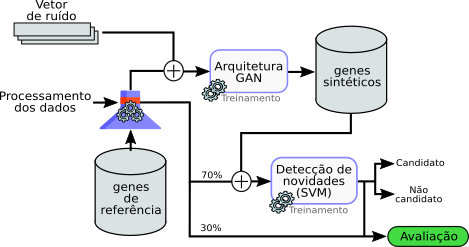

In [2]:
from PIL import Image
print("-----------------")
print("Proposed Method")
print("-----------------")
Image.open("../images/methodology_quali.png")

### Loading the preprocessed data
- Reference Genes are also loaded. Note: the <b>idnT</b> gene is not taken into account due to the high Coefficient of Variation of its gene expression.

In [3]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
data.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [4]:
rg = open("../data/reference_genes.txt").read().splitlines()
print(rg)

['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [5]:
rg_data = data.reindex(rg).dropna()
rg_data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


### Scaling the data
- the data is scaled between -1 and 1 to facilitate the training of the GAN architecture

In [6]:
scaler = EdwinRueda_utils.scaler(xmin=-1, xmax=1)
scaler.fit(rg_data)
rg_data = scaler.transform(rg_data)
print("Reference genes scaled: ")
rg_data

Reference genes scaled: 


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


### building the GAN architecture

In [41]:
noise_shape = 50
#generator network
G = Sequential()
G.add(Dense(noise_shape, input_shape=(noise_shape,)))
G.add(Dropout(.1))
G.add(Dense(70))
G.add(Dropout(.15))
G.add(Dense(20))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
D.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D.add(Dense(9))
D.add(Dense(30))
D.add(Dense(9))
D.add(Dense(1, activation="sigmoid"))

In [42]:
noise_vector = tf.random.normal((4, noise_shape), dtype=tf.float64)
print("synthetic samples: ")
synthetic_samples = G(noise_vector)
print(synthetic_samples)
print("----------------------------------------")
print("prediction of the discriminator network")
print("----------------------------------------")
D(synthetic_samples)

synthetic samples: 
tf.Tensor(
[[ 0.79823166 -0.90599919 -0.71810215 -0.88368209 -0.38508333  0.74693634
   0.61114645 -0.57159928  0.55569411]
 [-0.22424791 -0.10766914  0.91643081  0.99954107 -0.81527343 -0.76533379
  -0.9204066  -0.3310547   0.45056708]
 [ 0.87704186  0.84439332  0.85694435  0.65945656 -0.76251851 -0.78956681
  -0.8446319  -0.77068227  0.80534353]
 [ 0.89859919 -0.99565764 -0.99704465 -0.9336498   0.9692876  -0.29878657
   0.90150774 -0.10755732 -0.97244514]], shape=(4, 9), dtype=float64)
----------------------------------------
prediction of the discriminator network
----------------------------------------


<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.39534243],
       [0.57825565],
       [0.67116483],
       [0.16648625]])>

In [9]:
gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1000
optimizerG = tf.optimizers.SGD()
optimizerD = tf.optimizers.SGD()
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_input, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD)

epochs[0:1000] :: G_loss[0.804453] :: D_loss[0.994485] :: time:1.037560[s]
epochs[1:1000] :: G_loss[0.595016] :: D_loss[1.004697] :: time:0.013454[s]
epochs[2:1000] :: G_loss[1.178312] :: D_loss[0.817325] :: time:0.011480[s]
epochs[3:1000] :: G_loss[0.646914] :: D_loss[0.902278] :: time:0.010683[s]
epochs[4:1000] :: G_loss[0.923932] :: D_loss[0.851095] :: time:0.011139[s]
epochs[5:1000] :: G_loss[1.354413] :: D_loss[0.653617] :: time:0.011055[s]
epochs[6:1000] :: G_loss[0.957976] :: D_loss[0.929433] :: time:0.010756[s]
epochs[7:1000] :: G_loss[0.651387] :: D_loss[0.985887] :: time:0.010836[s]
epochs[8:1000] :: G_loss[0.865408] :: D_loss[0.837796] :: time:0.010941[s]
epochs[9:1000] :: G_loss[0.833812] :: D_loss[0.845401] :: time:0.010563[s]
epochs[10:1000] :: G_loss[0.573054] :: D_loss[0.953351] :: time:0.011463[s]
epochs[11:1000] :: G_loss[1.190919] :: D_loss[0.689937] :: time:0.012817[s]
epochs[12:1000] :: G_loss[0.903528] :: D_loss[0.788175] :: time:0.012633[s]
epochs[13:1000] :: G_l

epochs[124:1000] :: G_loss[0.740300] :: D_loss[0.676140] :: time:0.012120[s]
epochs[125:1000] :: G_loss[0.790552] :: D_loss[0.654067] :: time:0.014845[s]
epochs[126:1000] :: G_loss[0.781387] :: D_loss[0.656496] :: time:0.013906[s]
epochs[127:1000] :: G_loss[0.782012] :: D_loss[0.659676] :: time:0.013384[s]
epochs[128:1000] :: G_loss[0.743257] :: D_loss[0.674919] :: time:0.012677[s]
epochs[129:1000] :: G_loss[0.765659] :: D_loss[0.665865] :: time:0.010664[s]
epochs[130:1000] :: G_loss[0.787504] :: D_loss[0.653217] :: time:0.010221[s]
epochs[131:1000] :: G_loss[0.776712] :: D_loss[0.660621] :: time:0.010539[s]
epochs[132:1000] :: G_loss[0.775945] :: D_loss[0.660699] :: time:0.012092[s]
epochs[133:1000] :: G_loss[0.759638] :: D_loss[0.670332] :: time:0.010137[s]
epochs[134:1000] :: G_loss[0.709811] :: D_loss[0.685805] :: time:0.010817[s]
epochs[135:1000] :: G_loss[0.753700] :: D_loss[0.666080] :: time:0.010553[s]
epochs[136:1000] :: G_loss[0.805140] :: D_loss[0.644550] :: time:0.010319[s]

epochs[237:1000] :: G_loss[0.702207] :: D_loss[0.677484] :: time:0.011955[s]
epochs[238:1000] :: G_loss[0.754155] :: D_loss[0.668436] :: time:0.010366[s]
epochs[239:1000] :: G_loss[0.769872] :: D_loss[0.660217] :: time:0.010922[s]
epochs[240:1000] :: G_loss[0.844328] :: D_loss[0.648824] :: time:0.011456[s]
epochs[241:1000] :: G_loss[0.789109] :: D_loss[0.654514] :: time:0.011230[s]
epochs[242:1000] :: G_loss[0.731510] :: D_loss[0.688929] :: time:0.013261[s]
epochs[243:1000] :: G_loss[0.696101] :: D_loss[0.700550] :: time:0.011030[s]
epochs[244:1000] :: G_loss[0.704985] :: D_loss[0.699966] :: time:0.010360[s]
epochs[245:1000] :: G_loss[0.850835] :: D_loss[0.635089] :: time:0.010425[s]
epochs[246:1000] :: G_loss[0.709786] :: D_loss[0.681802] :: time:0.010286[s]
epochs[247:1000] :: G_loss[0.756523] :: D_loss[0.670917] :: time:0.010085[s]
epochs[248:1000] :: G_loss[0.742058] :: D_loss[0.672620] :: time:0.010088[s]
epochs[249:1000] :: G_loss[0.744814] :: D_loss[0.684216] :: time:0.010212[s]

epochs[353:1000] :: G_loss[0.678082] :: D_loss[0.702831] :: time:0.014834[s]
epochs[354:1000] :: G_loss[0.740112] :: D_loss[0.671557] :: time:0.012416[s]
epochs[355:1000] :: G_loss[0.707029] :: D_loss[0.692797] :: time:0.010706[s]
epochs[356:1000] :: G_loss[0.764862] :: D_loss[0.661675] :: time:0.010760[s]
epochs[357:1000] :: G_loss[0.731271] :: D_loss[0.674540] :: time:0.010194[s]
epochs[358:1000] :: G_loss[0.750862] :: D_loss[0.666687] :: time:0.010195[s]
epochs[359:1000] :: G_loss[0.666200] :: D_loss[0.709245] :: time:0.010518[s]
epochs[360:1000] :: G_loss[0.652949] :: D_loss[0.717236] :: time:0.010360[s]
epochs[361:1000] :: G_loss[0.732225] :: D_loss[0.673707] :: time:0.010279[s]
epochs[362:1000] :: G_loss[0.773725] :: D_loss[0.656121] :: time:0.010834[s]
epochs[363:1000] :: G_loss[0.679753] :: D_loss[0.697224] :: time:0.010416[s]
epochs[364:1000] :: G_loss[0.718982] :: D_loss[0.679921] :: time:0.010586[s]
epochs[365:1000] :: G_loss[0.710001] :: D_loss[0.683638] :: time:0.010417[s]

epochs[470:1000] :: G_loss[0.700278] :: D_loss[0.697453] :: time:0.018306[s]
epochs[471:1000] :: G_loss[0.705818] :: D_loss[0.695797] :: time:0.013572[s]
epochs[472:1000] :: G_loss[0.703439] :: D_loss[0.696289] :: time:0.010349[s]
epochs[473:1000] :: G_loss[0.706960] :: D_loss[0.695681] :: time:0.010404[s]
epochs[474:1000] :: G_loss[0.741549] :: D_loss[0.679232] :: time:0.010881[s]
epochs[475:1000] :: G_loss[0.742304] :: D_loss[0.679774] :: time:0.010702[s]
epochs[476:1000] :: G_loss[0.720843] :: D_loss[0.689905] :: time:0.014661[s]
epochs[477:1000] :: G_loss[0.745076] :: D_loss[0.677996] :: time:0.011591[s]
epochs[478:1000] :: G_loss[0.737295] :: D_loss[0.688869] :: time:0.011351[s]
epochs[479:1000] :: G_loss[0.741588] :: D_loss[0.679958] :: time:0.016548[s]
epochs[480:1000] :: G_loss[0.729835] :: D_loss[0.688266] :: time:0.012161[s]
epochs[481:1000] :: G_loss[0.705248] :: D_loss[0.698181] :: time:0.016955[s]
epochs[482:1000] :: G_loss[0.746948] :: D_loss[0.676702] :: time:0.016791[s]

epochs[593:1000] :: G_loss[0.718143] :: D_loss[0.690255] :: time:0.010562[s]
epochs[594:1000] :: G_loss[0.714414] :: D_loss[0.691884] :: time:0.015328[s]
epochs[595:1000] :: G_loss[0.715796] :: D_loss[0.695768] :: time:0.010612[s]
epochs[596:1000] :: G_loss[0.692598] :: D_loss[0.704375] :: time:0.010735[s]
epochs[597:1000] :: G_loss[0.677607] :: D_loss[0.710778] :: time:0.010380[s]
epochs[598:1000] :: G_loss[0.699728] :: D_loss[0.702179] :: time:0.010296[s]
epochs[599:1000] :: G_loss[0.735175] :: D_loss[0.682890] :: time:0.010369[s]
epochs[600:1000] :: G_loss[0.747400] :: D_loss[0.680684] :: time:0.010218[s]
epochs[601:1000] :: G_loss[0.766692] :: D_loss[0.672650] :: time:0.010663[s]
epochs[602:1000] :: G_loss[0.702908] :: D_loss[0.702062] :: time:0.010338[s]
epochs[603:1000] :: G_loss[0.757531] :: D_loss[0.677092] :: time:0.010352[s]
epochs[604:1000] :: G_loss[0.676667] :: D_loss[0.711902] :: time:0.010119[s]
epochs[605:1000] :: G_loss[0.736406] :: D_loss[0.682257] :: time:0.010390[s]

epochs[712:1000] :: G_loss[0.692285] :: D_loss[0.701650] :: time:0.016813[s]
epochs[713:1000] :: G_loss[0.710722] :: D_loss[0.692292] :: time:0.014385[s]
epochs[714:1000] :: G_loss[0.694063] :: D_loss[0.700905] :: time:0.014428[s]
epochs[715:1000] :: G_loss[0.680136] :: D_loss[0.707692] :: time:0.012858[s]
epochs[716:1000] :: G_loss[0.712507] :: D_loss[0.692686] :: time:0.010790[s]
epochs[717:1000] :: G_loss[0.707585] :: D_loss[0.694487] :: time:0.010597[s]
epochs[718:1000] :: G_loss[0.728032] :: D_loss[0.684809] :: time:0.010197[s]
epochs[719:1000] :: G_loss[0.731915] :: D_loss[0.684166] :: time:0.010545[s]
epochs[720:1000] :: G_loss[0.717854] :: D_loss[0.690638] :: time:0.010280[s]
epochs[721:1000] :: G_loss[0.699896] :: D_loss[0.697709] :: time:0.010180[s]
epochs[722:1000] :: G_loss[0.683512] :: D_loss[0.706548] :: time:0.010359[s]
epochs[723:1000] :: G_loss[0.722365] :: D_loss[0.687172] :: time:0.010268[s]
epochs[724:1000] :: G_loss[0.704066] :: D_loss[0.694383] :: time:0.010638[s]

epochs[831:1000] :: G_loss[0.705320] :: D_loss[0.692331] :: time:0.012054[s]
epochs[832:1000] :: G_loss[0.723835] :: D_loss[0.684139] :: time:0.011934[s]
epochs[833:1000] :: G_loss[0.719163] :: D_loss[0.686914] :: time:0.010488[s]
epochs[834:1000] :: G_loss[0.715533] :: D_loss[0.689304] :: time:0.010240[s]
epochs[835:1000] :: G_loss[0.702534] :: D_loss[0.694398] :: time:0.010145[s]
epochs[836:1000] :: G_loss[0.733016] :: D_loss[0.679376] :: time:0.013705[s]
epochs[837:1000] :: G_loss[0.709561] :: D_loss[0.689752] :: time:0.010747[s]
epochs[838:1000] :: G_loss[0.688161] :: D_loss[0.699355] :: time:0.010414[s]
epochs[839:1000] :: G_loss[0.706178] :: D_loss[0.691572] :: time:0.010067[s]
epochs[840:1000] :: G_loss[0.707749] :: D_loss[0.690278] :: time:0.010278[s]
epochs[841:1000] :: G_loss[0.695299] :: D_loss[0.696914] :: time:0.010155[s]
epochs[842:1000] :: G_loss[0.698996] :: D_loss[0.694830] :: time:0.010228[s]
epochs[843:1000] :: G_loss[0.708979] :: D_loss[0.690530] :: time:0.010101[s]

epochs[951:1000] :: G_loss[0.742407] :: D_loss[0.678356] :: time:0.015070[s]
epochs[952:1000] :: G_loss[0.724107] :: D_loss[0.687757] :: time:0.012617[s]
epochs[953:1000] :: G_loss[0.712433] :: D_loss[0.692290] :: time:0.011487[s]
epochs[954:1000] :: G_loss[0.695665] :: D_loss[0.700854] :: time:0.010343[s]
epochs[955:1000] :: G_loss[0.724137] :: D_loss[0.686671] :: time:0.010157[s]
epochs[956:1000] :: G_loss[0.700464] :: D_loss[0.698736] :: time:0.010126[s]
epochs[957:1000] :: G_loss[0.695258] :: D_loss[0.700701] :: time:0.010434[s]
epochs[958:1000] :: G_loss[0.727608] :: D_loss[0.684598] :: time:0.010141[s]
epochs[959:1000] :: G_loss[0.735667] :: D_loss[0.681633] :: time:0.010143[s]
epochs[960:1000] :: G_loss[0.717498] :: D_loss[0.690454] :: time:0.010185[s]
epochs[961:1000] :: G_loss[0.696504] :: D_loss[0.699749] :: time:0.010080[s]
epochs[962:1000] :: G_loss[0.716633] :: D_loss[0.689883] :: time:0.010167[s]
epochs[963:1000] :: G_loss[0.715646] :: D_loss[0.689910] :: time:0.010356[s]

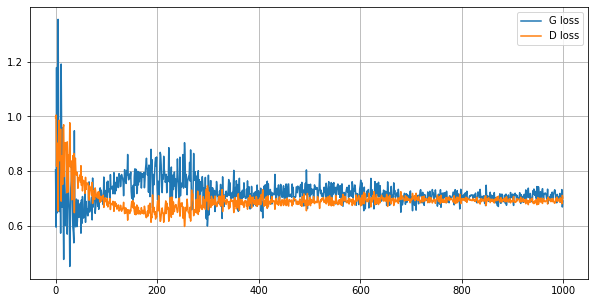

In [10]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss")
plt.plot(range(epochs), accumulated_dloss, label="D loss")
plt.legend()
plt.grid();

In [11]:
noise_vector = tf.random.normal((200,noise_input))
synthetic_samples = gan_utils.G(noise_vector)
synthetic_samples.shape

TensorShape([200, 9])

In [12]:
pca = PCA(n_components=2)
rg_data_pca = pca.fit_transform(rg_data)
synthetic_samples_pca = pca.transform(synthetic_samples)
print(rg_data_pca.shape, synthetic_samples_pca.shape)

(20, 2) (200, 2)


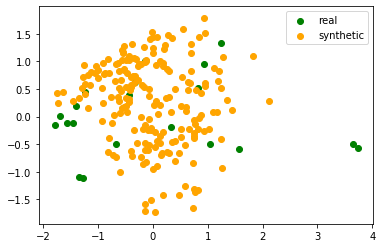

In [13]:
plt.scatter(rg_data_pca[:,0], rg_data_pca[:,1], color="green", label="real");
plt.scatter(synthetic_samples_pca[:,0], synthetic_samples_pca[:,1], color="orange", label="synthetic")
plt.legend();

###  Analysis of the synthetic sample

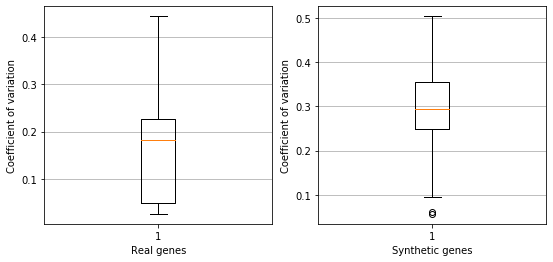

In [14]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
rg = scaler.inverse_transform(rg_data)
plt.boxplot(rg.std(axis=1)/rg.mean(axis=1))
plt.grid(axis="y")
plt.xlabel("Real genes")
plt.ylabel("Coefficient of variation");
plt.subplot(1,2,2)
syn = scaler.inverse_transform(synthetic_samples.numpy())
plt.boxplot(syn.std(axis=1)/syn.mean(axis=1));
plt.grid(axis="y")
plt.xlabel("Synthetic genes")
plt.ylabel("Coefficient of variation");

In [15]:
percentages = np.arange(25, 1000, 25)
percentages

array([ 25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325,
       350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625, 650,
       675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950, 975])

In [19]:
num_folds = 4
num_iter = 15
train_mean_score_p = []
train_std_score_p = []
test_mean_score_p = []
test_std_score_p = []
for p in percentages:
    tic = time()
    noise_vector = tf.random.normal(shape=(int((rg_data.shape[0]*p)/100), noise_input))
    synthetic_genes = gan_utils.G(noise_vector).numpy()
    augmented_data = np.concatenate((rg_data, synthetic_genes), axis=0)
    obj = EdwinRueda_utils.ocsvm_utilities(augmented_data, np.ones(augmented_data.shape[0]),
                                           test_size=.3, k_folds=num_folds)
    nu_params = 30
    params = {"nu":np.linspace(.001,0.5, nu_params)}
    train_score, test_score = obj.get_best_params(params, n_iter=num_iter)
    train_recall_score, test_recall_score = obj.get_statistics(iterations=30)
    #train params
    train_mean_score_p.append(np.mean(np.array(train_recall_score)))
    train_std_score_p.append(np.std(np.array(train_recall_score)))
    #test params
    test_mean_score_p.append(np.mean(np.array(test_recall_score)))
    test_std_score_p.append(np.std(np.array(test_recall_score)))
    toc = time()
    print("p:{} : time: {} [s]".format(p, toc-tic))

0.002583026885986328
25 : time: 2.1393280029296875
0.0022695064544677734
50 : time: 2.1661369800567627
0.0023200511932373047
75 : time: 2.2859668731689453
0.0022957324981689453
100 : time: 2.2552270889282227
0.002324342727661133
125 : time: 2.3500967025756836
0.00240325927734375
150 : time: 2.422703504562378
0.0023992061614990234
175 : time: 2.450955390930176
0.002398967742919922
200 : time: 2.4907922744750977
0.0028285980224609375
225 : time: 2.5252513885498047
0.0024023056030273438
250 : time: 2.5919582843780518
0.002578258514404297
275 : time: 2.7043426036834717
0.0025377273559570312
300 : time: 2.6905603408813477
0.0024712085723876953
325 : time: 2.7503628730773926
0.00249481201171875
350 : time: 2.8356149196624756
0.002492666244506836
375 : time: 2.8506317138671875
0.0026502609252929688
400 : time: 2.9490582942962646
0.0025451183319091797
425 : time: 2.9658923149108887
0.0026063919067382812
450 : time: 3.031920909881592
0.0025975704193115234
475 : time: 3.108532667160034
0.0025804

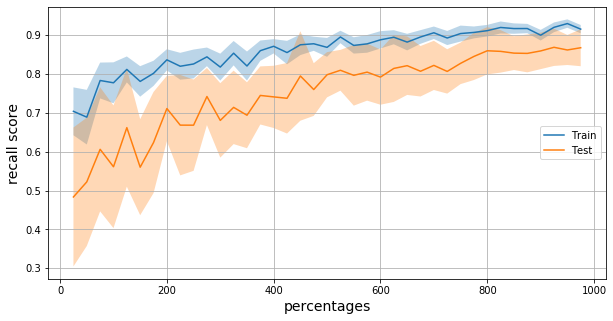

In [20]:
plt.figure(figsize=(10,5))
plt.plot(percentages, train_mean_score_p, label="Train");
plt.fill_between(percentages, np.array(train_mean_score_p)-np.array(train_std_score_p),
                np.array(train_mean_score_p)+np.array(train_std_score_p), alpha=.3)
#test results
plt.plot(percentages, test_mean_score_p, label="Test")
plt.fill_between(percentages, np.array(test_mean_score_p)-np.array(test_std_score_p),
                np.array(test_mean_score_p)+np.array(test_std_score_p), alpha=.3)
plt.grid()
plt.ylabel("recall score", fontsize=14)
plt.xlabel("percentages", fontsize=14)
plt.legend(loc="center right");

### Tuning parameters

In [72]:
noise_shape = 50
#generator network
G = Sequential()
G.add(Dense(noise_shape, input_shape=(noise_shape,)))
G.add(Dense(150))
G.add(Dropout(.15))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
D.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D.add(Dense(32))
D.add(tf.keras.layers.LeakyReLU(.1))
D.add(Dense(32))
D.add(Dense(1, activation="sigmoid"))

gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1600
optimizerG = tf.optimizers.SGD(learning_rate=0.00015, momentum=.92, decay=0.00015/epochs)
optimizerD = tf.optimizers.SGD(learning_rate=0.001, momentum=.9, decay=0.001/epochs)
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_input, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD)

epochs[0:1600] :: G_loss[0.632946] :: D_loss[0.746036] :: time:0.684404[s]
epochs[1:1600] :: G_loss[0.685376] :: D_loss[0.717018] :: time:0.010359[s]
epochs[2:1600] :: G_loss[0.671222] :: D_loss[0.727397] :: time:0.010186[s]
epochs[3:1600] :: G_loss[0.646207] :: D_loss[0.735951] :: time:0.009995[s]
epochs[4:1600] :: G_loss[0.728218] :: D_loss[0.696949] :: time:0.010005[s]
epochs[5:1600] :: G_loss[0.639383] :: D_loss[0.741528] :: time:0.010159[s]
epochs[6:1600] :: G_loss[0.672572] :: D_loss[0.720681] :: time:0.010155[s]
epochs[7:1600] :: G_loss[0.694815] :: D_loss[0.714366] :: time:0.010013[s]
epochs[8:1600] :: G_loss[0.621554] :: D_loss[0.757785] :: time:0.010199[s]
epochs[9:1600] :: G_loss[0.651533] :: D_loss[0.739664] :: time:0.010070[s]
epochs[10:1600] :: G_loss[0.706784] :: D_loss[0.706304] :: time:0.010124[s]
epochs[11:1600] :: G_loss[0.604474] :: D_loss[0.761261] :: time:0.010015[s]
epochs[12:1600] :: G_loss[0.659128] :: D_loss[0.732166] :: time:0.010119[s]
epochs[13:1600] :: G_l

epochs[117:1600] :: G_loss[0.783910] :: D_loss[0.631983] :: time:0.012344[s]
epochs[118:1600] :: G_loss[0.635482] :: D_loss[0.700903] :: time:0.012978[s]
epochs[119:1600] :: G_loss[0.672667] :: D_loss[0.677431] :: time:0.011872[s]
epochs[120:1600] :: G_loss[0.717425] :: D_loss[0.652319] :: time:0.012365[s]
epochs[121:1600] :: G_loss[0.658846] :: D_loss[0.683440] :: time:0.015662[s]
epochs[122:1600] :: G_loss[0.735187] :: D_loss[0.646317] :: time:0.010750[s]
epochs[123:1600] :: G_loss[0.710842] :: D_loss[0.660262] :: time:0.010500[s]
epochs[124:1600] :: G_loss[0.796789] :: D_loss[0.623404] :: time:0.010105[s]
epochs[125:1600] :: G_loss[0.752975] :: D_loss[0.640411] :: time:0.010348[s]
epochs[126:1600] :: G_loss[0.734663] :: D_loss[0.644846] :: time:0.010147[s]
epochs[127:1600] :: G_loss[0.741670] :: D_loss[0.643452] :: time:0.010639[s]
epochs[128:1600] :: G_loss[0.720814] :: D_loss[0.649214] :: time:0.010141[s]
epochs[129:1600] :: G_loss[0.720498] :: D_loss[0.654933] :: time:0.010372[s]

epochs[235:1600] :: G_loss[0.819833] :: D_loss[0.587218] :: time:0.013505[s]
epochs[236:1600] :: G_loss[0.668474] :: D_loss[0.653563] :: time:0.015315[s]
epochs[237:1600] :: G_loss[0.730082] :: D_loss[0.617971] :: time:0.010544[s]
epochs[238:1600] :: G_loss[0.726188] :: D_loss[0.627170] :: time:0.010638[s]
epochs[239:1600] :: G_loss[0.777072] :: D_loss[0.605105] :: time:0.010180[s]
epochs[240:1600] :: G_loss[0.762720] :: D_loss[0.609097] :: time:0.010013[s]
epochs[241:1600] :: G_loss[0.657293] :: D_loss[0.651796] :: time:0.010601[s]
epochs[242:1600] :: G_loss[0.765876] :: D_loss[0.605425] :: time:0.010514[s]
epochs[243:1600] :: G_loss[0.700117] :: D_loss[0.633143] :: time:0.010193[s]
epochs[244:1600] :: G_loss[0.756906] :: D_loss[0.611735] :: time:0.010154[s]
epochs[245:1600] :: G_loss[0.788708] :: D_loss[0.595617] :: time:0.010087[s]
epochs[246:1600] :: G_loss[0.791496] :: D_loss[0.592334] :: time:0.010149[s]
epochs[247:1600] :: G_loss[0.748306] :: D_loss[0.614895] :: time:0.010127[s]

epochs[355:1600] :: G_loss[0.836245] :: D_loss[0.571704] :: time:0.015621[s]
epochs[356:1600] :: G_loss[0.767121] :: D_loss[0.601469] :: time:0.011569[s]
epochs[357:1600] :: G_loss[0.767688] :: D_loss[0.588280] :: time:0.010409[s]
epochs[358:1600] :: G_loss[0.854263] :: D_loss[0.555874] :: time:0.010195[s]
epochs[359:1600] :: G_loss[0.828721] :: D_loss[0.559959] :: time:0.011273[s]
epochs[360:1600] :: G_loss[0.758133] :: D_loss[0.586527] :: time:0.010303[s]
epochs[361:1600] :: G_loss[0.798343] :: D_loss[0.572820] :: time:0.010214[s]
epochs[362:1600] :: G_loss[0.798987] :: D_loss[0.576602] :: time:0.010197[s]
epochs[363:1600] :: G_loss[0.822587] :: D_loss[0.569399] :: time:0.010046[s]
epochs[364:1600] :: G_loss[0.863839] :: D_loss[0.547057] :: time:0.010060[s]
epochs[365:1600] :: G_loss[0.794382] :: D_loss[0.571671] :: time:0.010154[s]
epochs[366:1600] :: G_loss[0.737369] :: D_loss[0.603791] :: time:0.010031[s]
epochs[367:1600] :: G_loss[0.858805] :: D_loss[0.551086] :: time:0.010180[s]

epochs[474:1600] :: G_loss[0.822450] :: D_loss[0.591179] :: time:0.012045[s]
epochs[475:1600] :: G_loss[0.874492] :: D_loss[0.539234] :: time:0.012422[s]
epochs[476:1600] :: G_loss[0.885794] :: D_loss[0.545380] :: time:0.010527[s]
epochs[477:1600] :: G_loss[0.798064] :: D_loss[0.569637] :: time:0.010258[s]
epochs[478:1600] :: G_loss[0.850703] :: D_loss[0.554669] :: time:0.010273[s]
epochs[479:1600] :: G_loss[0.771331] :: D_loss[0.587921] :: time:0.010087[s]
epochs[480:1600] :: G_loss[0.799089] :: D_loss[0.568569] :: time:0.010146[s]
epochs[481:1600] :: G_loss[0.817390] :: D_loss[0.553793] :: time:0.010311[s]
epochs[482:1600] :: G_loss[0.836665] :: D_loss[0.556346] :: time:0.010070[s]
epochs[483:1600] :: G_loss[0.774461] :: D_loss[0.590115] :: time:0.010323[s]
epochs[484:1600] :: G_loss[0.824896] :: D_loss[0.565801] :: time:0.010150[s]
epochs[485:1600] :: G_loss[0.804079] :: D_loss[0.587967] :: time:0.010139[s]
epochs[486:1600] :: G_loss[0.820260] :: D_loss[0.572605] :: time:0.010212[s]

epochs[594:1600] :: G_loss[0.848770] :: D_loss[0.556967] :: time:0.015300[s]
epochs[595:1600] :: G_loss[0.909030] :: D_loss[0.535498] :: time:0.012915[s]
epochs[596:1600] :: G_loss[0.906853] :: D_loss[0.543391] :: time:0.010277[s]
epochs[597:1600] :: G_loss[0.802748] :: D_loss[0.574214] :: time:0.010279[s]
epochs[598:1600] :: G_loss[0.916827] :: D_loss[0.517086] :: time:0.010172[s]
epochs[599:1600] :: G_loss[0.827961] :: D_loss[0.567735] :: time:0.010153[s]
epochs[600:1600] :: G_loss[0.929851] :: D_loss[0.530596] :: time:0.010208[s]
epochs[601:1600] :: G_loss[0.881981] :: D_loss[0.538789] :: time:0.010333[s]
epochs[602:1600] :: G_loss[0.897587] :: D_loss[0.549918] :: time:0.010221[s]
epochs[603:1600] :: G_loss[0.783756] :: D_loss[0.597034] :: time:0.010263[s]
epochs[604:1600] :: G_loss[0.808920] :: D_loss[0.573234] :: time:0.010012[s]
epochs[605:1600] :: G_loss[0.880414] :: D_loss[0.554097] :: time:0.010156[s]
epochs[606:1600] :: G_loss[0.868972] :: D_loss[0.568221] :: time:0.010108[s]

epochs[713:1600] :: G_loss[0.901131] :: D_loss[0.582391] :: time:0.015197[s]
epochs[714:1600] :: G_loss[0.961018] :: D_loss[0.539068] :: time:0.011027[s]
epochs[715:1600] :: G_loss[0.940527] :: D_loss[0.550078] :: time:0.010349[s]
epochs[716:1600] :: G_loss[0.753359] :: D_loss[0.638819] :: time:0.010316[s]
epochs[717:1600] :: G_loss[0.912656] :: D_loss[0.550966] :: time:0.010252[s]
epochs[718:1600] :: G_loss[0.917061] :: D_loss[0.579099] :: time:0.010210[s]
epochs[719:1600] :: G_loss[0.838036] :: D_loss[0.590038] :: time:0.010244[s]
epochs[720:1600] :: G_loss[0.865636] :: D_loss[0.597364] :: time:0.010242[s]
epochs[721:1600] :: G_loss[0.758163] :: D_loss[0.667772] :: time:0.010167[s]
epochs[722:1600] :: G_loss[0.967180] :: D_loss[0.555479] :: time:0.010216[s]
epochs[723:1600] :: G_loss[0.790970] :: D_loss[0.614880] :: time:0.010223[s]
epochs[724:1600] :: G_loss[0.964660] :: D_loss[0.538592] :: time:0.010110[s]
epochs[725:1600] :: G_loss[0.947209] :: D_loss[0.555064] :: time:0.010186[s]

epochs[833:1600] :: G_loss[0.772876] :: D_loss[0.654657] :: time:0.011702[s]
epochs[834:1600] :: G_loss[0.954119] :: D_loss[0.594490] :: time:0.012157[s]
epochs[835:1600] :: G_loss[0.896729] :: D_loss[0.593492] :: time:0.010509[s]
epochs[836:1600] :: G_loss[0.926701] :: D_loss[0.580919] :: time:0.010467[s]
epochs[837:1600] :: G_loss[0.972188] :: D_loss[0.566018] :: time:0.010364[s]
epochs[838:1600] :: G_loss[0.868426] :: D_loss[0.620721] :: time:0.010194[s]
epochs[839:1600] :: G_loss[0.967461] :: D_loss[0.592971] :: time:0.010222[s]
epochs[840:1600] :: G_loss[0.866506] :: D_loss[0.642471] :: time:0.010296[s]
epochs[841:1600] :: G_loss[0.940042] :: D_loss[0.571554] :: time:0.010243[s]
epochs[842:1600] :: G_loss[0.896620] :: D_loss[0.612476] :: time:0.010142[s]
epochs[843:1600] :: G_loss[0.833323] :: D_loss[0.625871] :: time:0.010252[s]
epochs[844:1600] :: G_loss[0.782801] :: D_loss[0.643023] :: time:0.010118[s]
epochs[845:1600] :: G_loss[0.840823] :: D_loss[0.647977] :: time:0.010226[s]

epochs[953:1600] :: G_loss[0.806935] :: D_loss[0.661703] :: time:0.015021[s]
epochs[954:1600] :: G_loss[0.808697] :: D_loss[0.669370] :: time:0.012415[s]
epochs[955:1600] :: G_loss[0.879134] :: D_loss[0.647234] :: time:0.010377[s]
epochs[956:1600] :: G_loss[0.918007] :: D_loss[0.637484] :: time:0.010329[s]
epochs[957:1600] :: G_loss[0.785532] :: D_loss[0.699728] :: time:0.010349[s]
epochs[958:1600] :: G_loss[0.843829] :: D_loss[0.650417] :: time:0.010318[s]
epochs[959:1600] :: G_loss[0.849016] :: D_loss[0.648142] :: time:0.010155[s]
epochs[960:1600] :: G_loss[0.872997] :: D_loss[0.638258] :: time:0.010204[s]
epochs[961:1600] :: G_loss[0.714852] :: D_loss[0.738939] :: time:0.010239[s]
epochs[962:1600] :: G_loss[0.867742] :: D_loss[0.642029] :: time:0.010111[s]
epochs[963:1600] :: G_loss[0.818548] :: D_loss[0.667124] :: time:0.010373[s]
epochs[964:1600] :: G_loss[0.686069] :: D_loss[0.714504] :: time:0.010520[s]
epochs[965:1600] :: G_loss[0.789778] :: D_loss[0.672874] :: time:0.010794[s]

epochs[1073:1600] :: G_loss[0.920716] :: D_loss[0.629410] :: time:0.011963[s]
epochs[1074:1600] :: G_loss[0.764576] :: D_loss[0.690325] :: time:0.011405[s]
epochs[1075:1600] :: G_loss[0.839481] :: D_loss[0.675289] :: time:0.010467[s]
epochs[1076:1600] :: G_loss[0.760644] :: D_loss[0.692783] :: time:0.010511[s]
epochs[1077:1600] :: G_loss[0.719154] :: D_loss[0.726674] :: time:0.010381[s]
epochs[1078:1600] :: G_loss[0.761283] :: D_loss[0.693691] :: time:0.010887[s]
epochs[1079:1600] :: G_loss[0.800146] :: D_loss[0.678605] :: time:0.011453[s]
epochs[1080:1600] :: G_loss[0.795316] :: D_loss[0.702148] :: time:0.010229[s]
epochs[1081:1600] :: G_loss[0.665754] :: D_loss[0.753684] :: time:0.010228[s]
epochs[1082:1600] :: G_loss[0.666758] :: D_loss[0.739884] :: time:0.010353[s]
epochs[1083:1600] :: G_loss[0.807829] :: D_loss[0.674987] :: time:0.010169[s]
epochs[1084:1600] :: G_loss[0.859576] :: D_loss[0.639917] :: time:0.010407[s]
epochs[1085:1600] :: G_loss[0.815722] :: D_loss[0.674240] :: tim

epochs[1193:1600] :: G_loss[0.886297] :: D_loss[0.636603] :: time:0.012073[s]
epochs[1194:1600] :: G_loss[0.770091] :: D_loss[0.699227] :: time:0.012175[s]
epochs[1195:1600] :: G_loss[0.754388] :: D_loss[0.693031] :: time:0.010238[s]
epochs[1196:1600] :: G_loss[0.706121] :: D_loss[0.716028] :: time:0.010423[s]
epochs[1197:1600] :: G_loss[0.735280] :: D_loss[0.714391] :: time:0.010313[s]
epochs[1198:1600] :: G_loss[0.707067] :: D_loss[0.719988] :: time:0.010370[s]
epochs[1199:1600] :: G_loss[0.700060] :: D_loss[0.720124] :: time:0.010185[s]
epochs[1200:1600] :: G_loss[0.823279] :: D_loss[0.678337] :: time:0.010402[s]
epochs[1201:1600] :: G_loss[0.824826] :: D_loss[0.672085] :: time:0.010146[s]
epochs[1202:1600] :: G_loss[0.855650] :: D_loss[0.650627] :: time:0.010482[s]
epochs[1203:1600] :: G_loss[0.862824] :: D_loss[0.656634] :: time:0.010362[s]
epochs[1204:1600] :: G_loss[0.803399] :: D_loss[0.685176] :: time:0.010106[s]
epochs[1205:1600] :: G_loss[0.868759] :: D_loss[0.653840] :: tim

epochs[1313:1600] :: G_loss[0.803045] :: D_loss[0.680752] :: time:0.015660[s]
epochs[1314:1600] :: G_loss[0.785184] :: D_loss[0.686283] :: time:0.012432[s]
epochs[1315:1600] :: G_loss[0.758084] :: D_loss[0.694815] :: time:0.010415[s]
epochs[1316:1600] :: G_loss[0.823713] :: D_loss[0.666704] :: time:0.010385[s]
epochs[1317:1600] :: G_loss[0.680464] :: D_loss[0.739772] :: time:0.010240[s]
epochs[1318:1600] :: G_loss[0.790265] :: D_loss[0.678704] :: time:0.010170[s]
epochs[1319:1600] :: G_loss[0.865200] :: D_loss[0.659369] :: time:0.010209[s]
epochs[1320:1600] :: G_loss[0.757227] :: D_loss[0.696979] :: time:0.010236[s]
epochs[1321:1600] :: G_loss[0.835614] :: D_loss[0.672340] :: time:0.010393[s]
epochs[1322:1600] :: G_loss[0.761614] :: D_loss[0.699433] :: time:0.010209[s]
epochs[1323:1600] :: G_loss[0.772249] :: D_loss[0.694773] :: time:0.010332[s]
epochs[1324:1600] :: G_loss[0.787821] :: D_loss[0.687054] :: time:0.010214[s]
epochs[1325:1600] :: G_loss[0.846430] :: D_loss[0.655733] :: tim

epochs[1429:1600] :: G_loss[0.767750] :: D_loss[0.684043] :: time:0.012857[s]
epochs[1430:1600] :: G_loss[0.766026] :: D_loss[0.686710] :: time:0.010797[s]
epochs[1431:1600] :: G_loss[0.825265] :: D_loss[0.663184] :: time:0.010587[s]
epochs[1432:1600] :: G_loss[0.697222] :: D_loss[0.715397] :: time:0.010425[s]
epochs[1433:1600] :: G_loss[0.845558] :: D_loss[0.653925] :: time:0.010260[s]
epochs[1434:1600] :: G_loss[0.748497] :: D_loss[0.694939] :: time:0.010098[s]
epochs[1435:1600] :: G_loss[0.802759] :: D_loss[0.671682] :: time:0.010138[s]
epochs[1436:1600] :: G_loss[0.750203] :: D_loss[0.692146] :: time:0.011261[s]
epochs[1437:1600] :: G_loss[0.756874] :: D_loss[0.693183] :: time:0.010744[s]
epochs[1438:1600] :: G_loss[0.741935] :: D_loss[0.697806] :: time:0.010299[s]
epochs[1439:1600] :: G_loss[0.775055] :: D_loss[0.683355] :: time:0.010293[s]
epochs[1440:1600] :: G_loss[0.775957] :: D_loss[0.684719] :: time:0.010272[s]
epochs[1441:1600] :: G_loss[0.818797] :: D_loss[0.665262] :: tim

epochs[1542:1600] :: G_loss[0.786348] :: D_loss[0.674671] :: time:0.012096[s]
epochs[1543:1600] :: G_loss[0.764206] :: D_loss[0.683666] :: time:0.015166[s]
epochs[1544:1600] :: G_loss[0.812928] :: D_loss[0.661419] :: time:0.010597[s]
epochs[1545:1600] :: G_loss[0.753525] :: D_loss[0.692007] :: time:0.010368[s]
epochs[1546:1600] :: G_loss[0.749487] :: D_loss[0.696512] :: time:0.010453[s]
epochs[1547:1600] :: G_loss[0.749199] :: D_loss[0.688380] :: time:0.010100[s]
epochs[1548:1600] :: G_loss[0.821626] :: D_loss[0.661470] :: time:0.010281[s]
epochs[1549:1600] :: G_loss[0.801914] :: D_loss[0.670384] :: time:0.010195[s]
epochs[1550:1600] :: G_loss[0.826554] :: D_loss[0.654717] :: time:0.010409[s]
epochs[1551:1600] :: G_loss[0.700552] :: D_loss[0.713557] :: time:0.010192[s]
epochs[1552:1600] :: G_loss[0.801141] :: D_loss[0.671591] :: time:0.010192[s]
epochs[1553:1600] :: G_loss[0.779638] :: D_loss[0.679037] :: time:0.010505[s]
epochs[1554:1600] :: G_loss[0.804335] :: D_loss[0.667316] :: tim

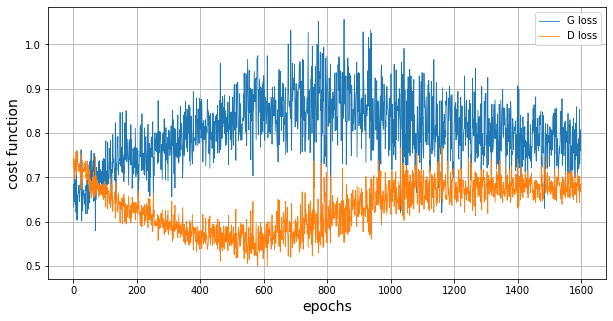

In [73]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss", linewidth=.8)
plt.plot(range(epochs), accumulated_dloss, label="D loss", linewidth=.8)
plt.xlabel("epochs", fontsize=14)
plt.ylabel("cost function", fontsize=14)
plt.legend()
plt.grid();

(20, 2) (200, 2)


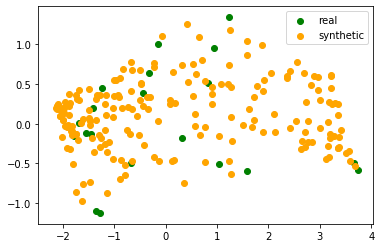

In [74]:
noise_vector = tf.random.normal((200,noise_input))
synthetic_samples = gan_utils.G(noise_vector)
synthetic_samples.shape

pca = PCA(n_components=2)
rg_data_pca = pca.fit_transform(rg_data)
synthetic_samples_pca = pca.transform(synthetic_samples)
print(rg_data_pca.shape, synthetic_samples_pca.shape)

plt.scatter(rg_data_pca[:,0], rg_data_pca[:,1], color="green", label="real");
plt.scatter(synthetic_samples_pca[:,0], synthetic_samples_pca[:,1], color="orange", label="synthetic")
plt.legend();

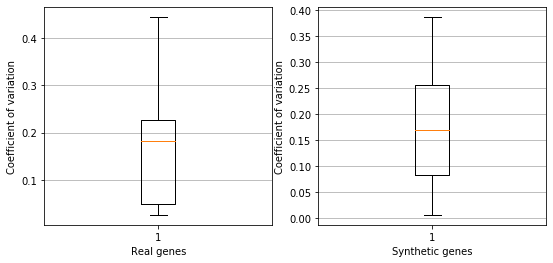

In [75]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
rg = scaler.inverse_transform(rg_data)
plt.boxplot(rg.std(axis=1)/rg.mean(axis=1))
plt.grid(axis="y")
plt.xlabel("Real genes")
plt.ylabel("Coefficient of variation");
plt.subplot(1,2,2)
syn = scaler.inverse_transform(synthetic_samples.numpy())
plt.boxplot(syn.std(axis=1)/syn.mean(axis=1));
plt.grid(axis="y")
plt.xlabel("Synthetic genes")
plt.ylabel("Coefficient of variation");

In [77]:
percentages = np.arange(25, 1000, 25)
num_folds = 4
num_iter = 15
train_mean_score_p = []
train_std_score_p = []
test_mean_score_p = []
test_std_score_p = []
for p in percentages:
    tic = time()
    noise_vector = tf.random.normal(shape=(int((rg_data.shape[0]*p)/100), noise_input))
    synthetic_genes = gan_utils.G(noise_vector).numpy()
    augmented_data = np.concatenate((rg_data, synthetic_genes), axis=0)
    obj = EdwinRueda_utils.ocsvm_utilities(augmented_data, np.ones(augmented_data.shape[0]),
                                           test_size=.3, k_folds=num_folds)
    nu_params = 30
    params = {"nu":np.linspace(.001,0.5, nu_params)}
    train_score, test_score = obj.get_best_params(params, n_iter=num_iter)
    train_recall_score, test_recall_score = obj.get_statistics(iterations=30)
    #train params
    train_mean_score_p.append(np.mean(np.array(train_recall_score)))
    train_std_score_p.append(np.std(np.array(train_recall_score)))
    #test params
    test_mean_score_p.append(np.mean(np.array(test_recall_score)))
    test_std_score_p.append(np.std(np.array(test_recall_score)))
    toc = time()
    print("p:{} : time: {} [s]".format(p, toc-tic))

p:25 : time: 2.1815271377563477 [s]
p:50 : time: 2.1878113746643066 [s]
p:75 : time: 2.387136936187744 [s]
p:100 : time: 2.5059306621551514 [s]
p:125 : time: 2.2971339225769043 [s]
p:150 : time: 2.3501031398773193 [s]
p:175 : time: 2.4401180744171143 [s]
p:200 : time: 2.451434373855591 [s]
p:225 : time: 2.4658632278442383 [s]
p:250 : time: 2.5353636741638184 [s]
p:275 : time: 2.6027557849884033 [s]
p:300 : time: 2.6232717037200928 [s]
p:325 : time: 2.670091152191162 [s]
p:350 : time: 2.7415733337402344 [s]
p:375 : time: 2.794651985168457 [s]
p:400 : time: 2.8781275749206543 [s]
p:425 : time: 2.904280662536621 [s]
p:450 : time: 2.9905362129211426 [s]
p:475 : time: 3.0319557189941406 [s]
p:500 : time: 3.0822532176971436 [s]
p:525 : time: 3.139885663986206 [s]
p:550 : time: 3.2056713104248047 [s]
p:575 : time: 3.262608766555786 [s]
p:600 : time: 3.3607735633850098 [s]
p:625 : time: 3.408290386199951 [s]
p:650 : time: 3.4801344871520996 [s]
p:675 : time: 3.538926362991333 [s]
p:700 : time:

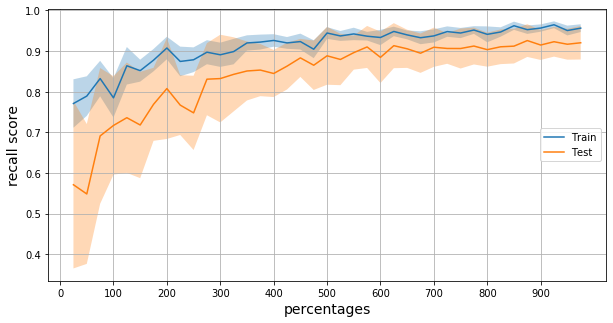

In [80]:
plt.figure(figsize=(10,5))
plt.plot(percentages, train_mean_score_p, label="Train");
plt.fill_between(percentages, np.array(train_mean_score_p)-np.array(train_std_score_p),
                np.array(train_mean_score_p)+np.array(train_std_score_p), alpha=.3)
#test results
plt.plot(percentages, test_mean_score_p, label="Test")
plt.fill_between(percentages, np.array(test_mean_score_p)-np.array(test_std_score_p),
                np.array(test_mean_score_p)+np.array(test_std_score_p), alpha=.3)
plt.grid()
plt.ylabel("recall score", fontsize=14)
plt.xlabel("percentages", fontsize=14)
plt.xticks(range(0,1000, 100), range(0,1000, 100))
plt.legend(loc="center right");